# 凯利公式与扔骰子

## 本文分为两个部分
## 1. 第一部分——
### 以扔硬币为例，在给定概率和盈亏比情况下，通过模拟验证了根据凯利公式确定的下注比率为最优。
## 2. 第二部分——
### 以扔骰子为例，通过模拟验证了多次独立随机试验后，骰子点数的总和服从正态分布。

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import datetime
from collections import defaultdict
import scipy.stats as stats
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

### 凯利公式 $f = \frac{bp - q}{b}$

### 用户参数设置

In [53]:
# b为赔率
b = 1
# p为猜对的概率
p = 0.51
# q为猜错的概率
q = 1-p
# N为总模拟次数
N = 100
# Nround为每次模拟掷硬币的次数
Nround = 10000
# 初始资金
init_balance = 10000

In [58]:
# 根据凯利公式计算最优下注比率
optimalRatio = (b * p - q)/b

ratio_list = [optimalRatio / 4.0, optimalRatio/ 2.0, optimalRatio*2.0, optimalRatio*4.0]
#ratio_list = np.delete(ratio_list, [int(3.0-1)])

optimal_balance = np.zeros(Nround + 1)
ratio_balance = {}
for tmpratio in ratio_list:
    ratio_balance[tmpratio] = np.zeros(Nround + 1)

optimalbalance = []

In [62]:
for i in range(N):
#     print i
    # 生成随机数
    draws = np.random.uniform(0, 1, Nround)

    # 初始资金
    cur_balance = init_balance
    balance_list = [init_balance]

    # balance_dic保存不同ratio下的资金
    balance_dic = defaultdict(list)
    for tmpratio in ratio_list:
        balance_dic[tmpratio].append(init_balance)

    for draw in draws:
        if draw <= p:
            # 猜对
            cur_balance += cur_balance * optimalRatio * b
            balance_list.append(cur_balance)
            for tmpratio in ratio_list:
                tmpbalance = balance_dic[tmpratio][-1]
                tmpbalance += tmpbalance * tmpratio * b
                balance_dic[tmpratio].append(tmpbalance)
        else:
            # 猜错
            cur_balance -= cur_balance * optimalRatio
            balance_list.append(cur_balance)
            for tmpratio in ratio_list:
                tmpbalance = balance_dic[tmpratio][-1]
                tmpbalance -= tmpbalance * tmpratio
                balance_dic[tmpratio].append(tmpbalance)
    
#     print balance_list[-1]
    
    optimal_balance += np.array(balance_list)

    for tmpratio in ratio_list:
        ratio_balance[tmpratio] += np.array(balance_dic[tmpratio])
#         print balance_dic[tmpratio][-1]

optimal_balance /= N
for tmpratio in ratio_list:
    ratio_balance[tmpratio] /= N

In [63]:
# 设置画图颜色
colormap = [(31, 119, 180) , (174, 199, 232) , (255, 127, 14)  , (255, 187, 120), 
            (44, 160, 44)  , (152, 223, 138) , (148, 103, 189) , (197, 176, 213), 
            (214, 39, 40)  , (255, 152, 150) , (140, 86, 75)   , (196, 156, 148),  
            (227, 119, 194), (247, 182, 210) , (127, 127, 127) , (199, 199, 199),  
            (188, 189, 34) , (219, 219, 141) , (23, 190, 207)  , (158, 218, 229)]  

for i in range(len(colormap)):  
    r, g, bb = colormap[i]  
    colormap[i] = (r / 255., g / 255., bb / 255.)  

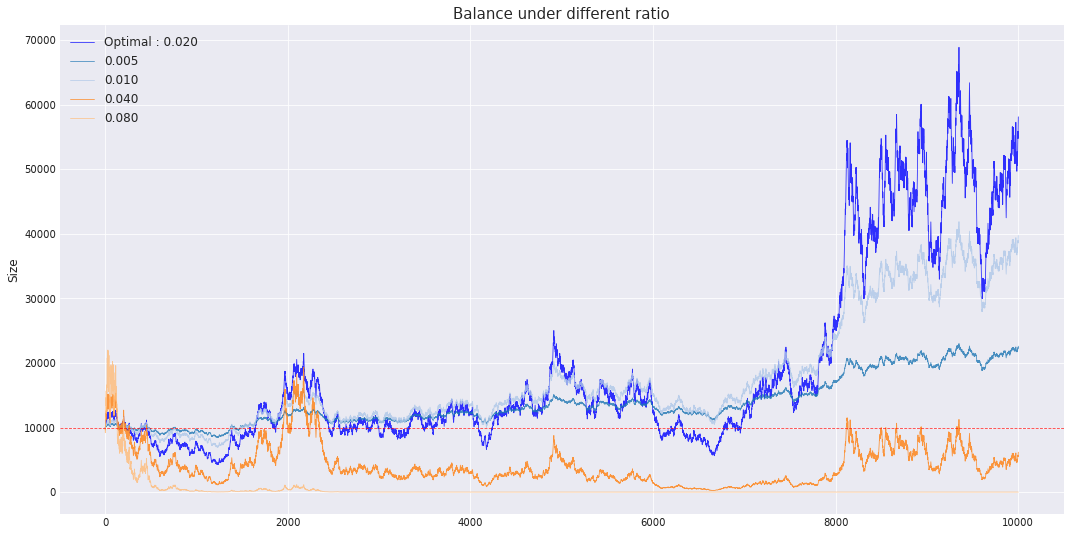

In [64]:
# 画图
fig, ax1 = plt.subplots(figsize=(18, 9))
ax1.plot(balance_list, color = 'blue', label = 'Optimal : %.3f' % optimalRatio, linewidth = 0.8, alpha = 0.8)
for i in range(len(ratio_list)):
    ax1.plot(balance_dic[ratio_list[i]], color = colormap[i], label = '%.3f' % ratio_list[i], linewidth = 0.8, alpha = 0.8)
ax1.axhline(y = init_balance, color = 'red', linestyle = '--', linewidth = 0.8, alpha = 0.8)
ax1.set_ylabel('Size', fontsize = 12)
#ax1.set_yscale("log")
plt.legend(fontsize = 12)
# ax2 = ax1.twinx()
# ax2.plot(dateList, closeArray, color = 'red')
# ax2.set_ylabel('Price')
plt.title('Balance under different ratio', fontsize=15)
plt.show()

### 掷骰子 

### 一枚正常骰子掷一万次，并将每次投掷的结果相加得到总和。将上述实验进行多次重复，从理论上我们可证明，总和的均值为35000，标准差为$100·\sqrt{\frac{35}{12}} \approx 170.78$

### 用户参数设置

In [ ]:
# N为总模拟次数
N = 10000
# Nround为每次模拟掷骰子的次数
Nround = 10000

In [78]:
result_list = []
for i in range(N):
    count = 0
    for j in range(Nround):
        count += np.random.randint(1, 7)
    result_list.append(count)

In [79]:
# 计算总和的统计量
avgRet = np.mean(result_list)
medianRet = np.median(result_list)
stdRet = np.std(result_list)
skewRet = stats.skew(result_list)
kurtRet = stats.kurtosis(result_list)
print(
"""
Average of count  : %.2f
Median of count   : %.2f
Std of count      : %.2f
Skewness of count : %.2f
Kurtosis of count : %.2f
""" %(avgRet, medianRet, stdRet, skewRet, kurtRet)
)


Average of count  : 34997.71
Median of count   : 35000.00
Std of count      : 170.93
Skewness of count : -0.02
Kurtosis of count : -0.02



In [80]:
# 超过1倍standard deviation的次数
np.sum(np.array(result_list) > 35170) + np.sum(np.array(result_list) < 34840)

3365

In [81]:
# 超过2倍standard deviation的次数
np.sum(np.array(result_list) > 35340) + np.sum(np.array(result_list) < 34660)

453

In [82]:
# 超过3倍standard deviation的次数
np.sum(np.array(result_list) > 35510) + np.sum(np.array(result_list) < 34490)

31

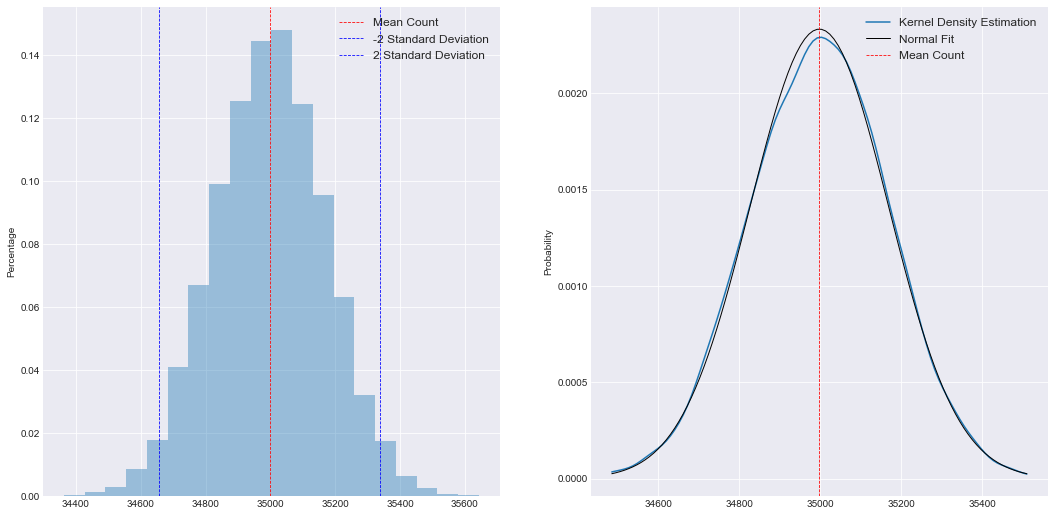

In [83]:
# 画日对数收益率分布直方图
fig = plt.figure(figsize=(18, 9))
v = result_list
x = np.linspace(avgRet - 3*stdRet, avgRet + 3*stdRet, 100)
y = mlab.normpdf(x, avgRet, stdRet)
kde = stats.gaussian_kde(v)

# plot the histogram
plt.subplot(121)
plt.hist(v, 20, weights = np.ones(len(v))/len(v), alpha = 0.4)
plt.axvline(x = avgRet, color = 'red', linestyle = '--', linewidth = 0.8, label = 'Mean Count')
plt.axvline(x = avgRet - 2 * stdRet, color = 'blue', linestyle = '--', linewidth = 0.8, label = '-2 Standard Deviation')
plt.axvline(x = avgRet + 2 * stdRet, color = 'blue', linestyle = '--', linewidth = 0.8, label = '2 Standard Deviation')
plt.ylabel('Percentage', fontsize = 10)
plt.legend(fontsize = 12)

# plot the kde and normal fit
plt.subplot(122)
plt.plot(x, kde(x), label = 'Kernel Density Estimation')
plt.plot(x, y, color = 'black', linewidth=1, label = 'Normal Fit')
plt.ylabel('Probability', fontsize = 10)
plt.axvline(x = avgRet, color = 'red', linestyle = '--', linewidth = 0.8, label = 'Mean Count')
plt.legend(fontsize = 12)